In [3]:
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv('alzheimer.csv')
df.head()


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [113]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['M/F'].values)
df.iloc[:, 1] = y
y = class_le.fit_transform(df['Group'].values)
df.iloc[:, 0] = y
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87.0,14.0,2.000000,27.0,0.0,1987.0,0.696,0.883
1,2,1,88.0,14.0,2.000000,30.0,0.0,2004.0,0.681,0.876
2,1,1,75.0,12.0,2.460452,23.0,0.5,1678.0,0.736,1.046
3,1,1,76.0,12.0,2.460452,28.0,0.5,1738.0,0.713,1.010
4,1,1,80.0,12.0,2.460452,22.0,0.5,1698.0,0.701,1.034


In [114]:
#from sklearn.model_selection import train_test_split
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print('Class label distribution: %s' %np.bincount(y_train)[1:])

Class label distribution: [102 133]


In [115]:
df.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [116]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [117]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
#imputed_data
df = pd.DataFrame(imputed_data, columns = ['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'])

In [118]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2.0,1.0,87.0,14.0,2.000000,27.0,0.0,1987.0,0.696,0.883
1,2.0,1.0,88.0,14.0,2.000000,30.0,0.0,2004.0,0.681,0.876
2,1.0,1.0,75.0,12.0,2.460452,23.0,0.5,1678.0,0.736,1.046
3,1.0,1.0,76.0,12.0,2.460452,28.0,0.5,1738.0,0.713,1.010
4,1.0,1.0,80.0,12.0,2.460452,22.0,0.5,1698.0,0.701,1.034


In [119]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [59]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [120]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = '11', solver = 'liblinear', multi_class = 'ovr')

LogisticRegression(multi_class='ovr', penalty='11', solver='liblinear')

In [121]:
lr = LogisticRegression(penalty = 'l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  0.896551724137931
Test accuracy:  0.9107142857142857


In [122]:
lr.intercept_

array([-2.5798, -1.0378, -1.1752])

In [123]:
lr.coef_

array([[-0.0107,  0.2777, -0.5384, -1.1742,  0.5945,  0.1608, -0.3963,
        -0.0182,  0.    ],
       [ 0.7738, -1.112 , -0.2029,  0.4134, -1.5505,  4.6207,  0.    ,
        -0.3494,  0.2937],
       [ 0.    ,  0.    ,  0.5625,  0.9543,  0.5355, -4.6134,  0.6706,
         0.197 ,  0.    ]])

[0.     0.     0.     0.     0.7738 1.939  2.286  2.3267 2.3309 2.3313]


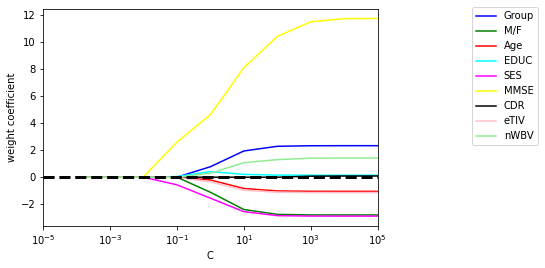

In [124]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
print(weights[:, 0])

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

## Feature selection

### Sequential feature selection algorithms

In [125]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [126]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

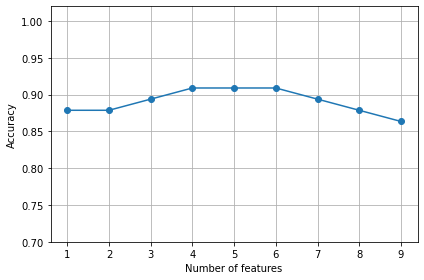

In [127]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [128]:
k3 = list(sbs.subsets_[8])
print(df.columns[1:][k3])

Index(['CDR'], dtype='object')


In [129]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.9003831417624522
Test accuracy:  0.8839285714285714


In [130]:
knn.fit(X_train_std[:, k3], y_train)
print('Traning Accuracy: ', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy; ', knn.score(X_test_std[:, k3], y_test))

#The result  is disaster.

Traning Accuracy:  0.685823754789272
Test accuracy;  0.6428571428571429


### Random Forests: Assessing Feature importance

 1 CDR                            0.448207
 2 MMSE                           0.185098
 3 nWBV                           0.090516
 4 eTIV                           0.064560
 5 ASF                            0.063553
 6 Age                            0.057779
 7 SES                            0.039790
 8 EDUC                           0.039517
 9 M/F                            0.010981


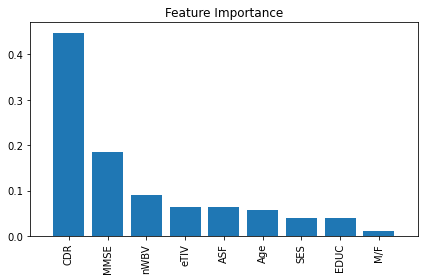

In [131]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f" %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim ([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

In [132]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 2
 1) CDR                            0.448207
 2) MMSE                           0.185098


#### Based on the above result, the 5th column (MMSE) and the 6th column (CDR) are good option for feature selection to work with

### ---------------------------------------------------------------------------------------------------------------

### Compressing Data via Dimensionality Reduction

In [133]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [134]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n\ncov_mat: \n%s' %cov_mat)

print('\n\nEigneValues \n%s'% eigen_vals)
print('\n\nEigenVectors: \n%s'% eigen_vecs)



cov_mat: 
[[ 1.0038e+00 -2.1772e-02  1.1351e-01 -4.3722e-02 -1.4881e-01  1.5034e-01
   5.8237e-01 -2.2369e-01 -5.6975e-01]
 [-2.1772e-02  1.0038e+00 -1.6886e-02 -5.8215e-02  5.1171e-02  3.9527e-02
   7.0571e-02 -5.3118e-01 -6.8623e-02]
 [ 1.1351e-01 -1.6886e-02  1.0038e+00 -7.3341e-01  1.8763e-01 -1.4827e-01
   2.5567e-01 -2.0100e-03 -2.4050e-01]
 [-4.3722e-02 -5.8215e-02 -7.3341e-01  1.0038e+00 -1.1134e-01  6.1394e-02
  -2.3447e-01  9.0358e-02  2.2409e-01]
 [-1.4881e-01  5.1171e-02  1.8763e-01 -1.1134e-01  1.0038e+00 -6.7209e-01
  -1.6976e-02  3.5725e-01  2.4744e-02]
 [ 1.5034e-01  3.9527e-02 -1.4827e-01  6.1394e-02 -6.7209e-01  1.0038e+00
  -1.5550e-02 -3.6851e-01  6.5426e-04]
 [ 5.8237e-01  7.0571e-02  2.5567e-01 -2.3447e-01 -1.6976e-02 -1.5550e-02
   1.0038e+00 -2.1006e-01 -9.9213e-01]
 [-2.2369e-01 -5.3118e-01 -2.0100e-03  9.0358e-02  3.5725e-01 -3.6851e-01
  -2.1006e-01  1.0038e+00  2.1581e-01]
 [-5.6975e-01 -6.8623e-02 -2.4050e-01  2.2409e-01  2.4744e-02  6.5426e-04
  -9.9213e

var_exp [0.3096775697370592, 0.23616655172644532, 0.1584554268893861, 0.13616252650718122, 0.05721421337412565, 0.040349773644837626, 0.032595600282371115, 0.028129497621404365, 0.0012488402171893511]
Cum_var_exp [0.3097 0.5458 0.7043 0.8405 0.8977 0.938  0.9706 0.9988 1.    ]


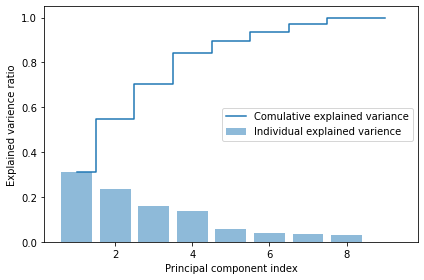

In [135]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
print('var_exp', var_exp)
cum_var_exp = np.cumsum(var_exp)
print('Cum_var_exp', cum_var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 10), var_exp, alpha=0.5, align='center', label='Individual explained varience')
plt.step(range(1, 10), cum_var_exp, where='mid', label='Comulative explained variance')

plt.ylabel('Explained varience ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Up to the 4th columns of the data, it covering almost 85% of the data. 

In [136]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
print(eigen_pairs)

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort (key=lambda k: k[0], reverse=True)
print('Eigen Pairs: ', eigen_pairs)

[(2.79781773581674, array([-0.4164, -0.1209, -0.2681,  0.2669,  0.0844, -0.0873, -0.542 ,
        0.2645,  0.5389])), (2.1336739615593094, array([ 0.0994,  0.1555, -0.3802,  0.3115, -0.535 ,  0.5305, -0.0686,
       -0.3855,  0.0583])), (1.4315838375506469, array([-0.3092,  0.4791,  0.3836, -0.4807, -0.0181,  0.1101, -0.2534,
       -0.3929,  0.2561])), (1.2301760567898803, array([-0.0169,  0.6162, -0.343 ,  0.3405,  0.4   , -0.3756,  0.1071,
       -0.2496, -0.1075])), (0.011282791039145338, array([-0.018 , -0.007 , -0.009 ,  0.0029,  0.0063,  0.014 ,  0.7132,
       -0.0065,  0.7005])), (0.5169084123685432, array([-0.8177,  0.003 , -0.1582, -0.0536, -0.1924,  0.0508,  0.3385,
        0.1246, -0.3656])), (0.3645446857373987, array([-0.0857, -0.4147,  0.0029,  0.0244, -0.3099, -0.6184, -0.0302,
       -0.5827,  0.0341])), (0.2541391919718419, array([-0.1545,  0.0095,  0.6929,  0.6934,  0.0124,  0.0928,  0.0359,
       -0.0607, -0.037 ])), (0.29448871178188385, array([ 0.1438,  0.424 , 

In [137]:
w =  np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

Matrix W: 
 [[-0.4164  0.0994]
 [-0.1209  0.1555]
 [-0.2681 -0.3802]
 [ 0.2669  0.3115]
 [ 0.0844 -0.535 ]
 [-0.0873  0.5305]
 [-0.542  -0.0686]
 [ 0.2645 -0.3855]
 [ 0.5389  0.0583]]


In [138]:
X_train_std[0].dot(w)

array([-1.5204, -0.9866])

In [139]:
X_train_pca = X_train_std.dot(w)
print(X_train_pca)

[[-1.5204e+00 -9.8664e-01]
 [ 1.8075e-01  1.0546e+00]
 [ 4.1724e-01  2.9687e+00]
 [ 1.8212e+00  1.8633e+00]
 [-2.5456e+00 -1.1673e+00]
 [ 1.5570e+00 -7.5948e-01]
 [-2.6099e+00 -1.2099e+00]
 [ 1.7191e+00 -3.9156e-01]
 [-1.2941e+00  1.5575e-01]
 [ 2.2713e+00 -1.6730e+00]
 [ 2.5751e+00 -1.8765e+00]
 [ 2.1197e+00 -1.6727e+00]
 [ 9.9549e-01  3.4350e-01]
 [ 1.8617e+00 -3.7588e-01]
 [-2.8325e+00  1.1213e-01]
 [-1.4101e+00 -1.1576e+00]
 [ 2.4373e-01 -6.6754e-01]
 [ 7.2252e-01 -1.0427e+00]
 [ 4.8029e-01  1.4031e+00]
 [ 3.4480e-01 -6.3809e-01]
 [ 7.9731e-01 -1.5022e+00]
 [ 2.7639e-01 -2.2585e+00]
 [ 7.6815e-01 -5.4813e-02]
 [ 3.0279e-01 -8.7727e-01]
 [ 2.1375e+00 -2.3883e+00]
 [ 8.6823e-01 -7.8104e-01]
 [ 2.4144e+00  6.3869e-01]
 [ 8.4644e-01 -1.0068e+00]
 [ 9.9683e-01  2.4546e+00]
 [-2.0755e+00 -9.3810e-01]
 [-6.9507e-01 -6.1424e-01]
 [-2.6396e+00 -2.1091e+00]
 [ 1.7123e+00  4.5426e-02]
 [-1.9880e+00 -1.9033e+00]
 [ 6.5109e-01 -1.2204e+00]
 [-9.9139e-01 -1.6494e+00]
 [-1.7075e+00 -4.3961e-01]
 

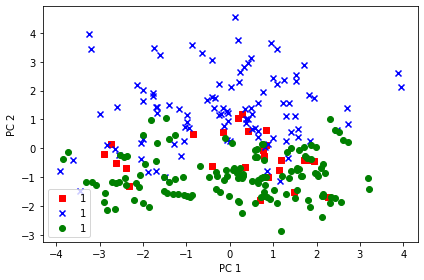

In [140]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
               X_train_pca[y_train==l, 1],
               c=c, label =1, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Linear Discriminant analysis

In [141]:
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1, 3): 
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis = 0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [ 0.2863 -0.0352 -0.3211  0.2469 -0.7692  0.9975 -0.0494 -0.4055  0.0377]

MV 2: [-0.1608 -0.0419  0.2152 -0.0692  0.5287 -0.7579  0.0883  0.337  -0.0729]



In [142]:
d = 9 #number of features
S_W = np.zeros((d,d))

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d))

for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
    
print('Within class scatter matrix: %sx%s' %(S_W.shape[0], S_W.shape[1]))

Within class scatter matrix: 9x9


In [144]:
d = 9 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 9x9


In [146]:
mean_overall = np.mean(X_train_std, axis = 0)
d = 9 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n= X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    
print('Between-class scatter matrix: %sx%s' %(S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 9x9


In [147]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [148]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted (eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

318.5021489408426
1.412673724941487
2.448280229866919e-14
1.2612998946453156e-14
1.2612998946453156e-14
5.964384245413927e-15
5.95278134540196e-15
5.95278134540196e-15
1.625895022950713e-15


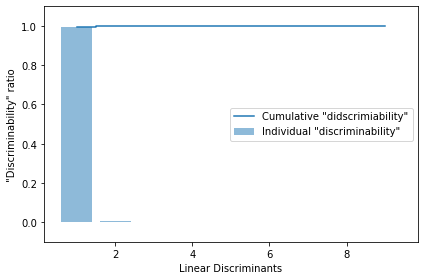

In [150]:
tot = sum (eigen_vals.real)
discr = [(i / tot) for i in sorted (eigen_vals.real, reverse=True)]

cum_discr = np.cumsum(discr)
plt.bar(range(1,10), discr, alpha = 0.5, align = 'center', label='Individual "discriminability"')
plt.step(range(1, 10), cum_discr, where = 'mid', label='Cumulative "didscrimiability"')

plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Linear Discriminative analysis is focusing just on CDR column. 

### -----------------------------------------------------------------

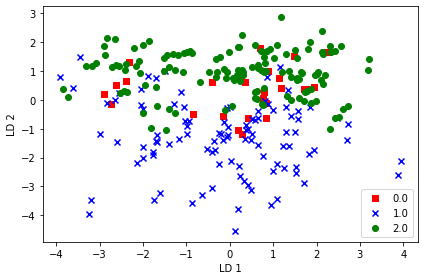

In [152]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1] * (-1), c=c, label = l, marker = m)
    
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## LDA via scikit-learn

In [153]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [155]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

/tmp/ipykernel_90368/49398212.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


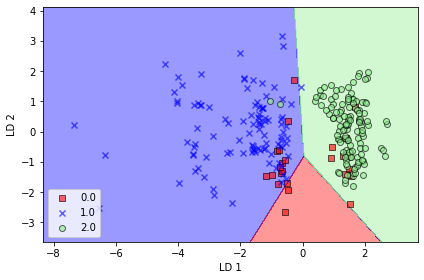

In [156]:
lr = LogisticRegression(multi_class='ovr', random_state = 1, solver = 'lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

#### Based on the above outcome, it shows that working with the two columns would be with much more errors that expected. 